In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import re

In [2]:
df = pd.read_csv(r'C:/Users/Shakil/Downloads/Compressed/usa_rain_prediction.csv')
df.head()

,Date,Location,Temperature,Humidity,Wind Speed,Precipitation,Cloud Cover,Pressure,Rain Tomorrow
0,2024-01-01,New York,87.524795,75.655455,28.379506,0.000000,69.617966,1026.030278,0
1,2024-01-02,New York,83.259325,28.712617,12.436433,0.526995,41.606048,995.962065,0
2,2024-01-03,New York,80.943050,64.740043,14.184831,0.916884,77.364763,980.796739,1
3,2024-01-04,New York,78.097552,59.738984,19.444029,0.094134,52.541196,979.012163,0
4,2024-01-05,New York,37.059963,34.766784,3.689661,1.361272,85.584000,1031.790859,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           73100 non-null  object 
 1   Location       73100 non-null  object 
 2   Temperature    73100 non-null  float64
 3   Humidity       73100 non-null  float64
 4   Wind Speed     73100 non-null  float64
 5   Precipitation  73100 non-null  float64
 6   Cloud Cover    73100 non-null  float64
 7   Pressure       73100 non-null  float64
 8   Rain Tomorrow  73100 non-null  int64  
dtypes: float64(6), int64(1), object(2)
memory usage: 5.0+ MB


In [4]:
df['Location'].unique()

array(['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix',
       'Philadelphia', 'San Antonio', 'San Diego', 'Dallas', 'San Jose',
       'Austin', 'Jacksonville', 'Fort Worth', 'Columbus', 'Indianapolis',
       'Charlotte', 'San Francisco', 'Seattle', 'Denver',
       'Washington D.C.'], dtype=object)

### EDA

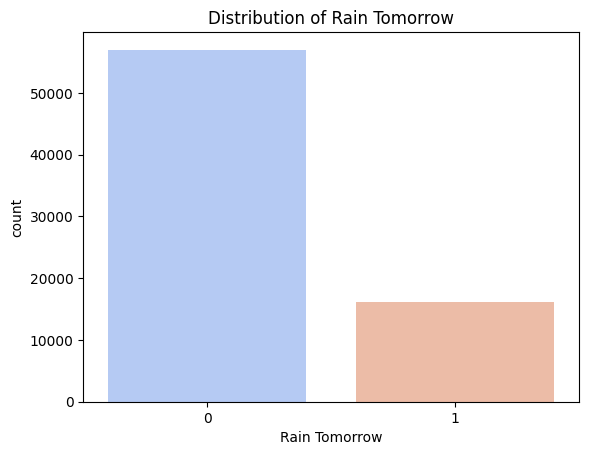

In [16]:
sns.countplot(x='Rain Tomorrow', data=df, palette='coolwarm')
plt.title('Distribution of Rain Tomorrow')
plt.show()

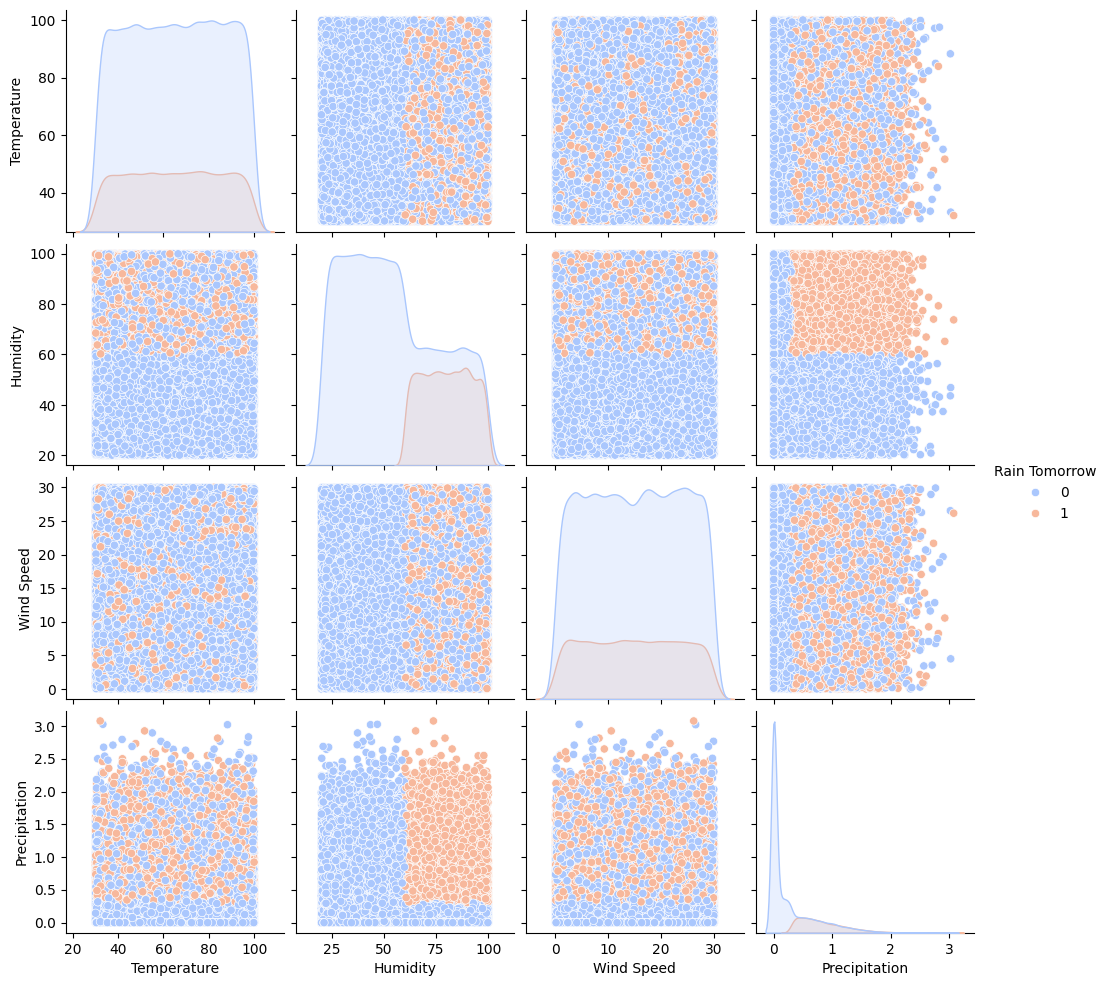

In [17]:
sns.pairplot(df[['Temperature', 'Humidity', 'Wind Speed', 'Precipitation', 'Rain Tomorrow']], hue='Rain Tomorrow', palette='coolwarm')
plt.show()

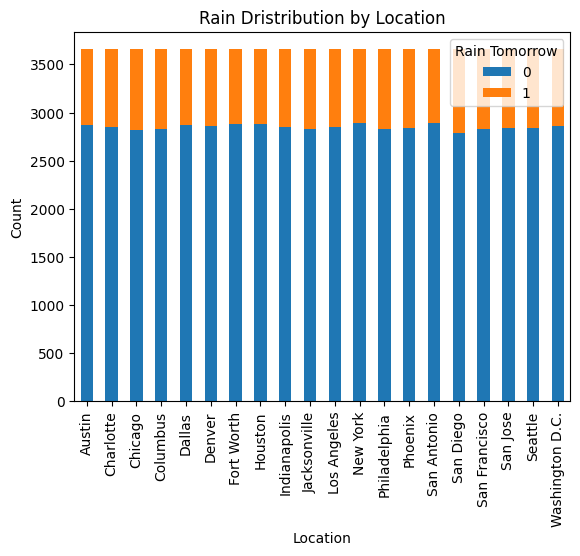

In [5]:
location_counts = df.groupby('Location')['Rain Tomorrow'].value_counts().unstack()
location_counts.plot(kind='bar', stacked=True)
plt.title('Rain Dristribution by Location')
plt.ylabel('Count')
plt.show()

<Axes: >

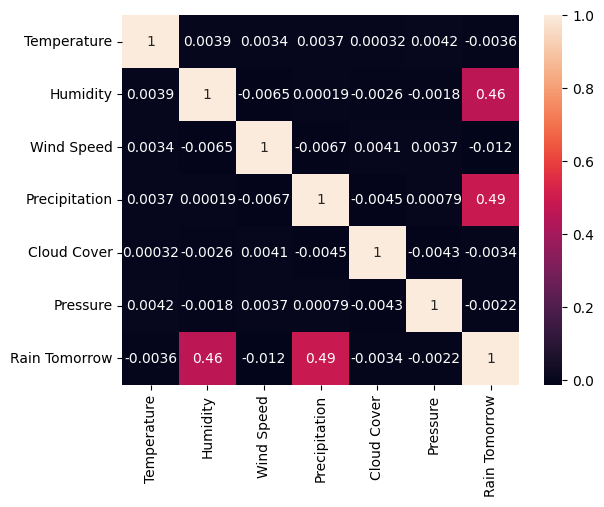

In [6]:
numeric_cols = df.drop(['Date', 'Location'], axis=1)

sns.heatmap(data=numeric_cols.corr(), annot=True)

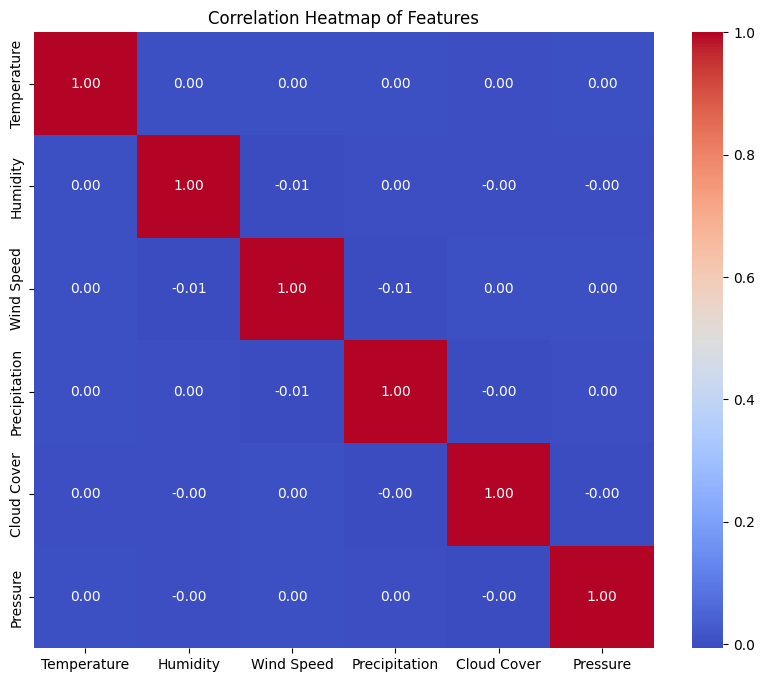

In [18]:
numeric_cols = df[['Temperature', 'Humidity', 'Wind Speed', 'Precipitation', 'Cloud Cover', 'Pressure']]

# Plot heatmap to visualize correlations between features
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Features')
plt.show()

### Machine Learning Model

In [8]:
x = numeric_cols.drop(['Rain Tomorrow'], axis=1)
y = numeric_cols['Rain Tomorrow']

### scaling

In [9]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
scaler = sc.fit_transform(x)

scaled_data = pd.DataFrame(scaler, columns=x.columns)
scaled_data.head()

,Temperature,Humidity,Wind Speed,Precipitation,Cloud Cover,Pressure
0,1.105756,0.684143,1.541362,-0.822685,0.564813,1.032198
1,0.894653,-1.351014,-0.297798,0.287176,-0.513302,-0.456051
2,0.780018,0.210917,-0.096107,1.108290,0.862970,-1.206671
3,0.639191,-0.005899,0.510584,-0.624437,-0.092433,-1.295000
4,-1.391804,-1.088542,-1.306808,2.044179,1.179310,1.317322


In [10]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2, random_state=42)

In [11]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

log_reg.fit(xtrain, ytrain)

LogisticRegression()

In [12]:
from sklearn.metrics import accuracy_score

ypred = log_reg.predict(xtest)
accuracy = accuracy_score(ytest, ypred)
accuracy

0.9071819425444596

In [13]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(ytest, ypred)
recall = recall_score(ytest, ypred)
f1 = f1_score(ytest, ypred)

print(f"Precision: {precision: .2f}")
print(f"Recall: {recall: .2f}")
print(f"F1-Score: {f1: .2f}")

Precision:  0.85
Recall:  0.71
F1-Score:  0.77


[[10967   402]
 [  955  2296]]


Text(50.722222222222214, 0.5, 'Actual')

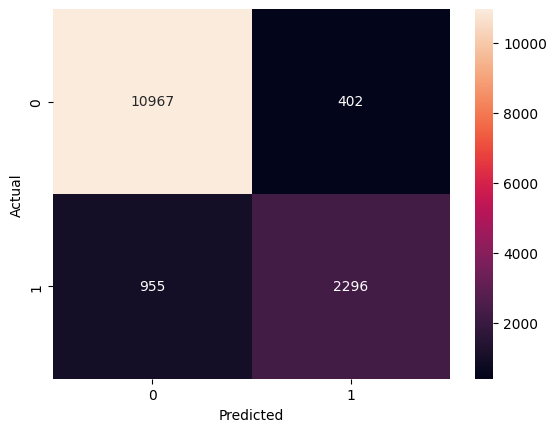

In [14]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(ytest, ypred)
print(cm)

sns.heatmap(data=cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

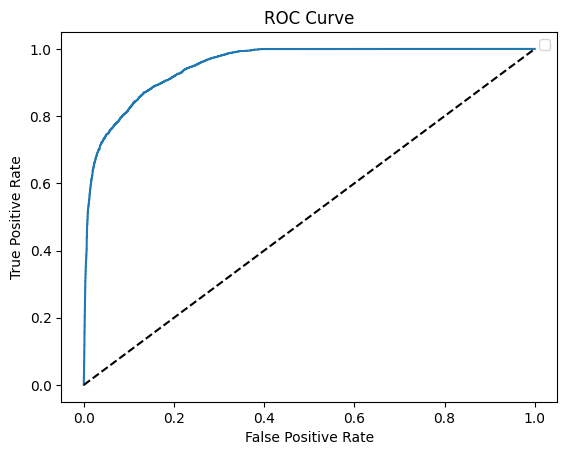

In [15]:
from sklearn.metrics import roc_curve, roc_auc_score

ypred_prob = log_reg.predict_proba(xtest)[:, 1]  
fpr, tpr, thresholds = roc_curve(ytest, ypred_prob)

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()